In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tkinter as tk
from tkinter import filedialog

In [2]:
# ---------------------------
# 1. Select and load CSV file
# ---------------------------
# Hide the main tkinter window
root = tk.Tk()
root.withdraw()

# Open file dialog to select CSV file
file_path = filedialog.askopenfilename(title="Select CSV File", filetypes=[("CSV files", "*.csv")])
if not file_path:
    raise Exception("No file was selected!")

# Read CSV data
data = pd.read_csv(file_path)

In [5]:
# ---------------------------
# 2. Prepare data
# ---------------------------
# Specify the number of independent variables (modify this as needed)
n = 1  # e.g., if the first column is the feature

# Assume: first n columns are features and the last column is the target
X = data.iloc[:, :n].values  # shape: (n_samples, n_features)
y = data.iloc[:, -1].values  # shape: (n_samples,)

In [7]:
# ---------------------------
# 3. Train Random Forest Regressor
# ---------------------------
# Specify the number of trees in the forest
n_estimators = 100

# Create and fit the model
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [9]:
# ---------------------------
# 4. Compute cost (MSE) vs. number of trees
# ---------------------------
# For each number of trees (from 1 to n_estimators), compute the training MSE
costs = []
# model.estimators_ is the list of individual tree estimators
for i in range(1, n_estimators + 1):
    # Get predictions from the first i trees and average them
    preds = np.mean([est.predict(X) for est in model.estimators_[:i]], axis=0)
    mse = mean_squared_error(y, preds)
    costs.append(mse)

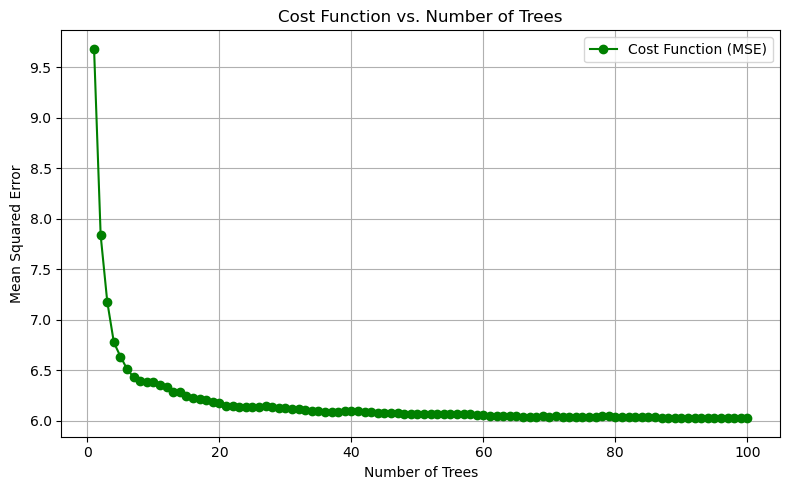

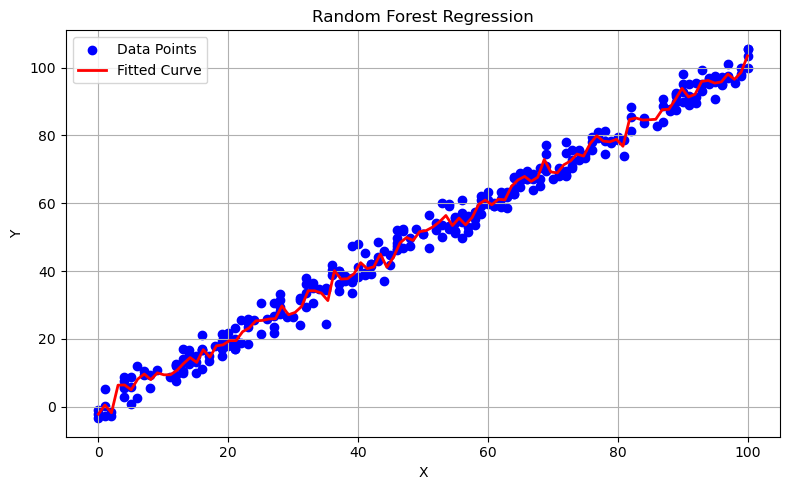

In [11]:
# ---------------------------
# 5. Visualization
# ---------------------------

# Plot cost function vs. number of trees
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), costs, marker='o', color='green', label='Cost Function (MSE)')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# If feature is one-dimensional, plot scatter and fitted curve
if n == 1:
    # Create a grid for X values to plot a smooth curve
    X_min, X_max = X.min(), X.max()
    X_grid = np.linspace(X_min, X_max, 100).reshape(-1, 1)
    y_grid_pred = model.predict(X_grid)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X_grid, y_grid_pred, color='red', linewidth=2, label='Fitted Curve')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Forest Regression')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
